# REGRESION

+ Modelo estadistico que te vincula la relacion entre una variable respuesta y otra variables esplicativas.
+ permite a partir de una serie de valores explicativos, te permite predecir valores de la variable respuesta.

In [1]:
# Read in dataset
import pandas as pd
dataset = pd.read_csv('fish.csv')

dataset.head()

,species,mass_g,length_cm
0,Bream,242.0,23.2
1,Bream,290.0,24.0
2,Bream,340.0,23.9
3,Bream,363.0,26.3
4,Bream,430.0,26.5


In [2]:
dataset.groupby('species').describe()

mass_g                                                                \
         count        mean         std    min     25%    50%     75%     max   
species                                                                        
Bream     35.0  617.828571  209.205709  242.0  462.50  610.0  717.00  1000.0   
Perch     56.0  382.239286  347.617717    5.9  120.00  207.5  692.50  1100.0   
Pike      17.0  718.705882  494.140765  200.0  345.00  510.0  950.00  1650.0   
Roach     20.0  152.050000   88.828916    0.0  104.25  147.5  171.75   390.0   

        length_cm                                                          
            count       mean       std   min     25%    50%     75%   max  
species                                                                    
Bream        35.0  30.305714  3.593699  23.2  28.000  30.40  31.950  38.0  
Perch        56.0  25.735714  8.561572   7.5  19.825  23.25  34.125  41.1  
Pike         17.0  42.476471  9.029087  30.0  35.500  40.10  48.300  59.0  
Roach        20.0  20.645000  3.459917  12.9  18.900  20.50  22.025  29.5

In [3]:
#correlacion
dataset.corr()

,mass_g,length_cm
mass_g,1.000000,0.906956
length_cm,0.906956,1.000000


# regresion lineal
+ cuando utilizas campos numeros
+ tecnica matematica que apartir de dos variabes podemos predecir sus valores

# regesion logistica
+ cuando utilizas campos cualitativos

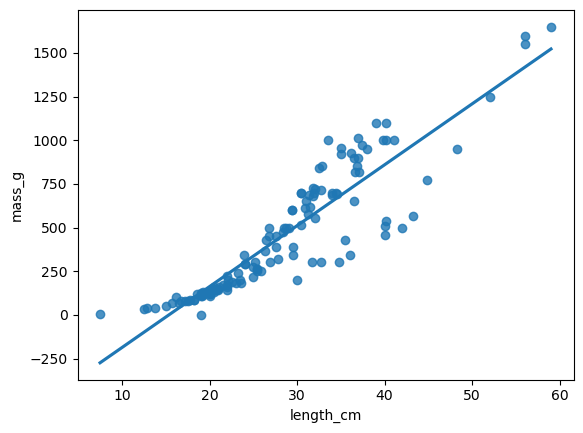

In [4]:
# ver crelacion entre las dos variables

import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x='length_cm', y='mass_g',ci=None, data=dataset)
plt.show()

## CALCULAR LINEA DE REGRESION

In [5]:
from statsmodels.formula.api import ols

# calculamos el modelo 

mdl_peso_vs_longitud = ols('mass_g~length_cm',data=dataset).fit()

# ver parametros
print(mdl_peso_vs_longitud.params)

Intercept   -536.223947
length_cm     34.899245
dtype: float64


In [6]:
# predecir masa de peces de rio
import numpy as np

data_explicativa = pd.DataFrame({"length_cm":[20]})
print(mdl_peso_vs_longitud.predict(data_explicativa))

data_explicativaRange = pd.DataFrame({"length_cm":np.arange(50,70)})
print(mdl_peso_vs_longitud.predict(data_explicativaRange))

0    161.760959
dtype: float64
0     1208.738318
1     1243.637563
2     1278.536809
3     1313.436054
4     1348.335299
5     1383.234545
6     1418.133790
7     1453.033035
8     1487.932281
9     1522.831526
10    1557.730771
11    1592.630016
12    1627.529262
13    1662.428507
14    1697.327752
15    1732.226998
16    1767.126243
17    1802.025488
18    1836.924734
19    1871.823979
dtype: float64


In [7]:
data_predicted = data_explicativaRange.assign(mass=mdl_peso_vs_longitud.predict(data_explicativaRange))

## repito proceso (centrado en doradas)

In [8]:
df_dor = dataset[dataset['species']=='Bream']
df_dor

,species,mass_g,length_cm
0,Bream,242.0,23.2
1,Bream,290.0,24.0
2,Bream,340.0,23.9
3,Bream,363.0,26.3
4,Bream,430.0,26.5
5,Bream,450.0,26.8
6,Bream,500.0,26.8
7,Bream,390.0,27.6
8,Bream,450.0,27.6
9,Bream,500.0,28.5


<AxesSubplot:xlabel='length_cm', ylabel='mass_g'>

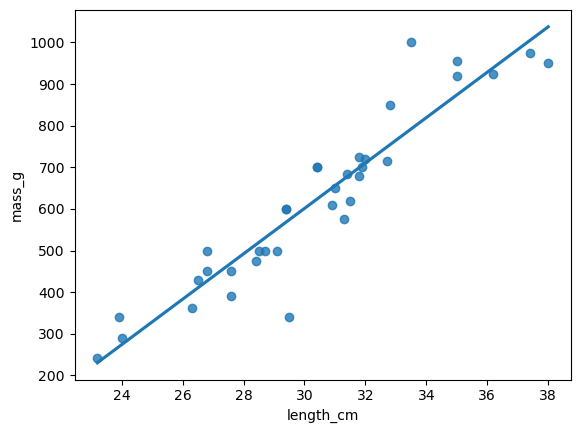

In [9]:
# obrservo si existe relacion entre variables

sns.regplot(x='length_cm', y='mass_g',ci=None, data=df_dor)

In [10]:
# mostrar valor de la correlacion
df_dor.corr()

,mass_g,length_cm
mass_g,1.00000,0.93705
length_cm,0.93705,1.00000


In [11]:
mdl_len_pes_dor = ols('mass_g~length_cm',data=df_dor).fit()

data_explicativaDorRange = pd.DataFrame({"length_cm":np.arange(50,70)})
print(mdl_len_pes_dor.predict(data_explicativaDorRange))

0     1692.151482
1     1746.701463
2     1801.251444
3     1855.801424
4     1910.351405
5     1964.901386
6     2019.451367
7     2074.001348
8     2128.551329
9     2183.101310
10    2237.651291
11    2292.201272
12    2346.751253
13    2401.301234
14    2455.851215
15    2510.401196
16    2564.951177
17    2619.501158
18    2674.051139
19    2728.601119
dtype: float64


In [12]:
df_predict = data_explicativaDorRange.assign(mass=mdl_len_pes_dor.predict(data_explicativaDorRange))
df_predict

,length_cm,mass
0,50,1692.151482
1,51,1746.701463
2,52,1801.251444
3,53,1855.801424
4,54,1910.351405
5,55,1964.901386
6,56,2019.451367
7,57,2074.001348
8,58,2128.551329
9,59,2183.101310


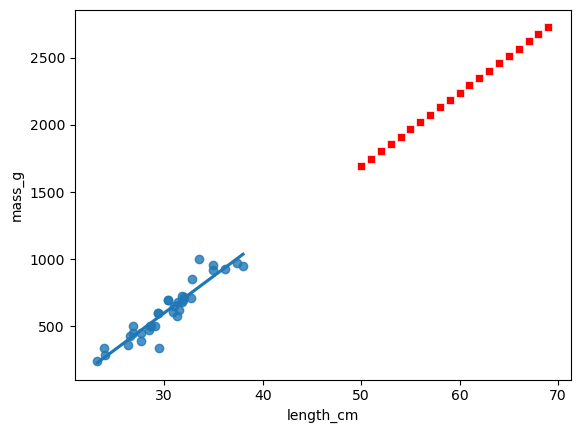

In [13]:
fig = plt.figure()
sns.regplot(x='length_cm', y='mass_g',ci=None, data=df_dor)
sns.scatterplot(x='length_cm', y='mass', data=df_predict,color='red',marker='s')

plt.show()

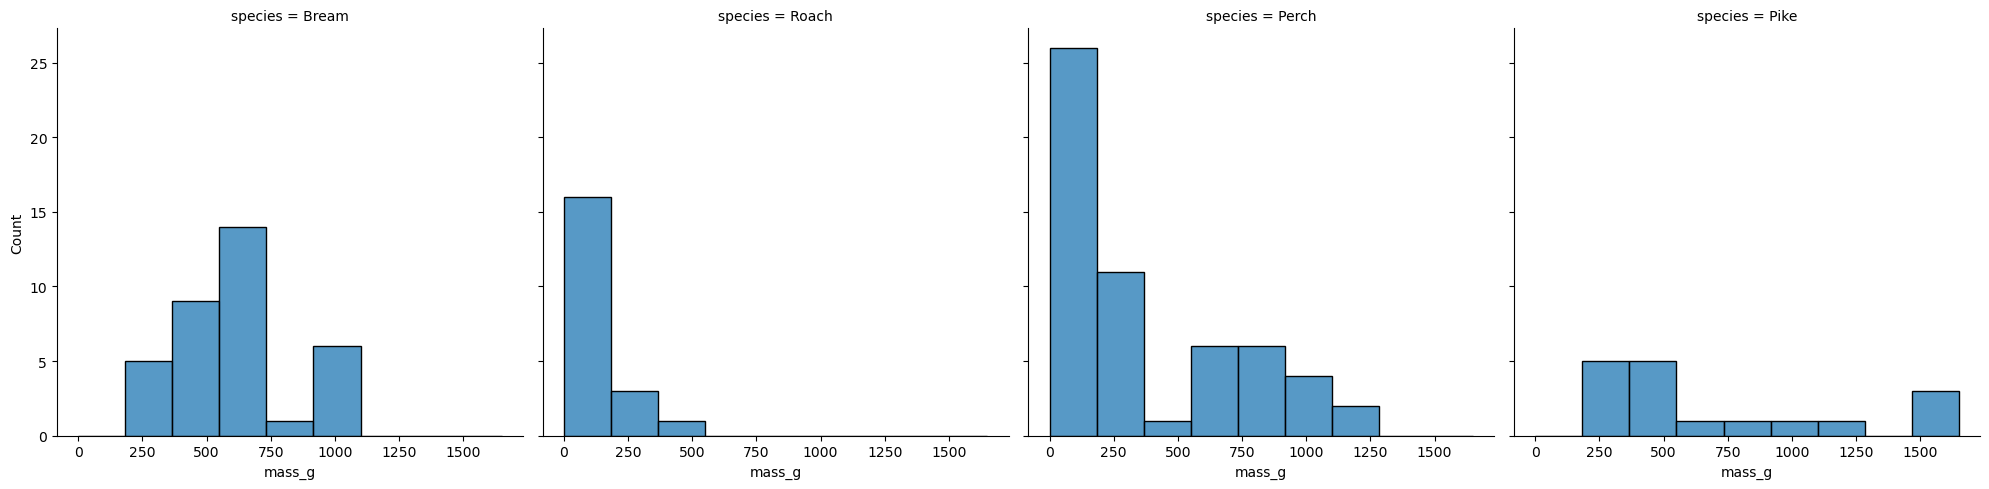

In [14]:
# comparar species
sns.displot(data=dataset,x='mass_g',col='species',bins=9)
plt.show()

In [15]:
dataset.groupby('species')['mass_g'].mean()

species
Bream    617.828571
Perch    382.239286
Pike     718.705882
Roach    152.050000
Name: mass_g, dtype: float64

In [16]:
mdl_peso_vs_species = ols('mass_g~species+0',data=dataset).fit()
print(mdl_peso_vs_species.params)

species[Bream]    617.828571
species[Perch]    382.239286
species[Pike]     718.705882
species[Roach]    152.050000
dtype: float64


In [17]:
## miramos para las parcas

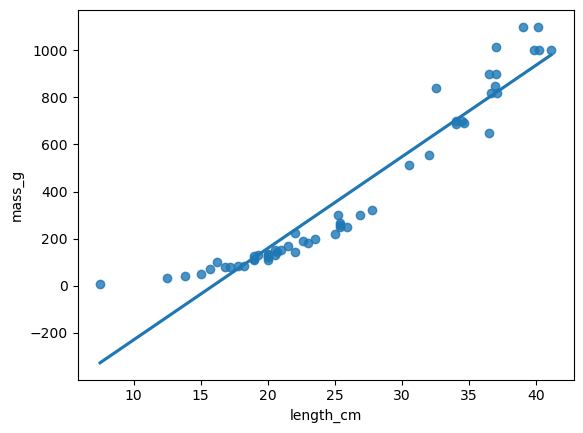

In [18]:
df_per = dataset[dataset['species']=='Perch']
sns.regplot(x='length_cm', y='mass_g',ci=None, data=df_per)
plt.show()

55       421.875
56      1953.125
57      2628.072
58      3375.000
59      3869.893
60      4251.528
61      4741.632
62      5088.448
63      5639.752
64      6028.568
65      6859.000
66      6859.000
67      6859.000
68      7189.057
69      8000.000
70      8000.000
71      8000.000
72      8000.000
73      8000.000
74      8615.125
75      8615.125
76      8869.743
77      9261.000
78      9938.375
79     10648.000
80     10648.000
81     11543.176
82     12167.000
83     12977.875
84     15625.000
85     16003.008
86     16387.064
87     16387.064
88     16387.064
89     17373.979
90     19465.109
91     21484.952
92     28372.625
93     32768.000
94     34328.125
95     39304.000
96     39304.000
97     41063.625
98     41421.736
99     48627.125
100    48627.125
101    49027.896
102    50243.409
103    50653.000
104    50653.000
105    51064.811
106    59319.000
107    63044.792
108    64481.201
109    64964.808
110    69426.531
Name: long_cubo, dtype: float64


D:\Temp\ipykernel_1472\3086870860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_per['long_cubo'] = df_per['length_cm'] ** 3


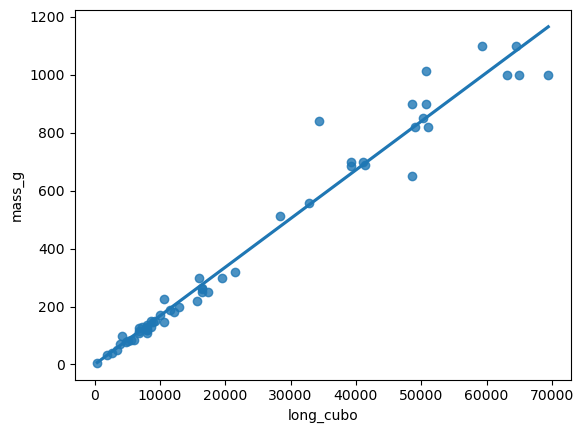

In [19]:
# transforma variables(la longitud al cubo)
df_per['long_cubo'] = df_per['length_cm'] ** 3
print(df_per['long_cubo'])
sns.regplot(x='long_cubo', y='mass_g',ci=None, data=df_per)
plt.show()

In [20]:
mdl_perch = ols('mass_g~long_cubo', data=df_per).fit()
predicted_data = pd.DataFrame({"length_cm" : np.arange(10,40,5),"long_cubo" : np.arange(10,40,5)**3})

In [21]:
predicted_data.head()

,length_cm,long_cubo
0,10,1000
1,15,3375
2,20,8000
3,25,15625
4,30,27000


In [22]:
res = mdl_perch.predict(predicted_data)
print(res)

0     16.678135
1     56.567717
2    134.247429
3    262.313982
4    453.364084
5    719.994447
dtype: float64


In [23]:
predicted_data=predicted_data.assign(mass_g=res)
predicted_data.head()

,length_cm,long_cubo,mass_g
0,10,1000,16.678135
1,15,3375,56.567717
2,20,8000,134.247429
3,25,15625,262.313982
4,30,27000,453.364084


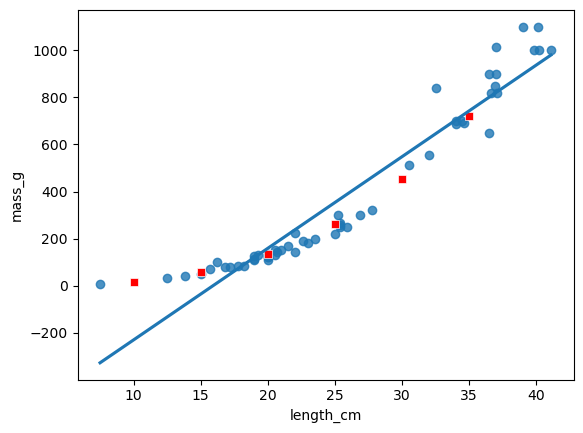

In [24]:
fig = plt.figure()
sns.regplot(x='length_cm', y='mass_g',ci=None, data=df_per)
sns.scatterplot(x='length_cm', y='mass_g', data=predicted_data,color='red',marker='s')

plt.show()

## validar modelos

In [25]:
mdl_perch = ols('mass_g~long_cubo', data=df_per).fit()
mdl_perch_org = ols('mass_g~length_cm', data=df_per).fit()

In [26]:
mdl_perch.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 mass_g   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1702.
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           1.64e-42
Time:                        19:58:21   Log-Likelihood:                -309.13
No. Observations:                  56   AIC:                             622.3
Df Residuals:                      54   BIC:                             626.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1175     12.389     -0.009      0.992     -24.957      24.722
long_cubo      0.0168      0.000     41.254      0.000       0.016       0.018
==============================================================================
Omnibus:                       28.634   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.539
Skew:                           1.158   Prob(JB):                     2.46e-27
Kurtosis:                       9.867   Cond. No.                     4.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
mdl_perch_org.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 mass_g   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     608.2
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           4.56e-31
Time:                        19:58:21   Log-Likelihood:                -336.43
No. Observations:                  56   AIC:                             676.9
Df Residuals:                      54   BIC:                             680.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -619.1751     42.755    -14.482      0.000    -704.894    -533.456
length_cm     38.9115      1.578     24.662      0.000      35.748      42.075
==============================================================================
Omnibus:                       11.572   Durbin-Watson:                   0.782
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.705
Skew:                           0.976   Prob(JB):                      0.00287
Kurtosis:                       4.099   Cond. No.                         86.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
#residuo modelo 
print(mdl_perch.mse_resid)

#residuo original
print(mdl_perch_org.mse_resid)


3785.103348896833
10036.068145838773


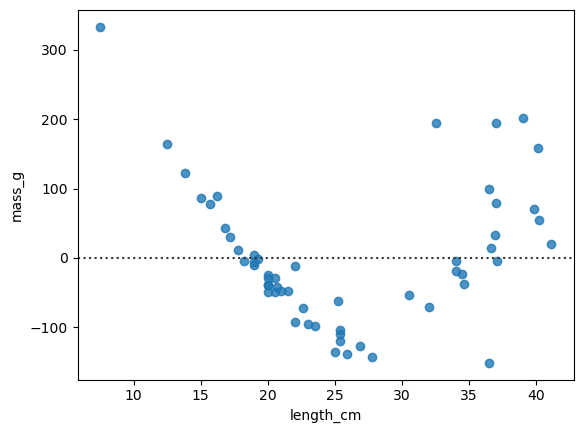

In [29]:
sns.residplot(x='length_cm', y='mass_g', data = df_per)
plt.show()

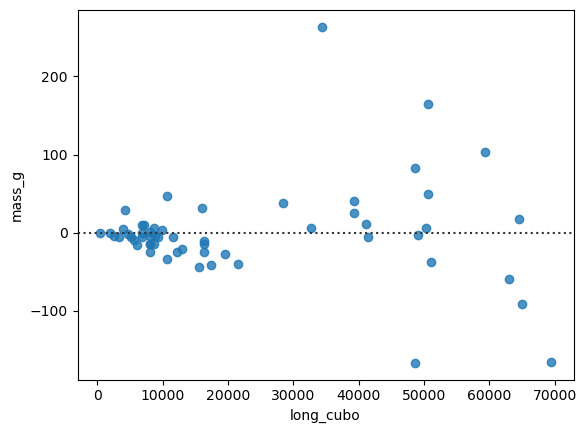

In [30]:
sns.residplot(x='long_cubo', y='mass_g', data = df_per)
plt.show()

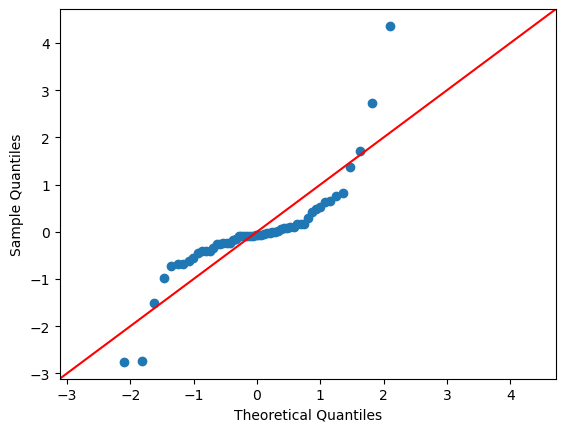

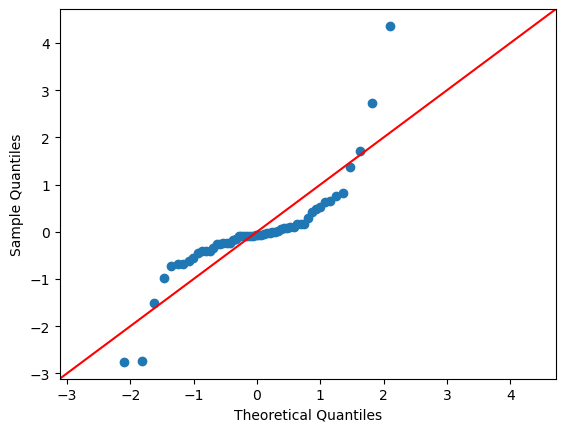

In [31]:
from statsmodels.api import qqplot
qqplot(data=mdl_perch.resid, fit=True,line='45')